# Numerical Integration

Let's import some modules to handle numerical data and ploting.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import quad

### Trapezoidal Rule

The Trapezoidal Rule consists of:

In [39]:
## Using here the chained trapezoidal rule

**Definition**

In [5]:
def trapezoidal(f, a, b, N):
    h = (b-a)/float(N)
    s = 0.5*(f(a) + f(b))
    for i in range(1,N,1):
        s = s + f(a + i*h)
    return h*s

**Parameters**

In [94]:
def f(t):
    return (1+np.sin(2*t))*np.exp(-0.1*t)

a = 0.0
b = 2*np.pi
N = 5

**Ploting the results**

'Real Value' (Gaussian Quadrature):  (4.89779335787146, 2.4283728785133835e-09)
Method Value:  4.766081938765454


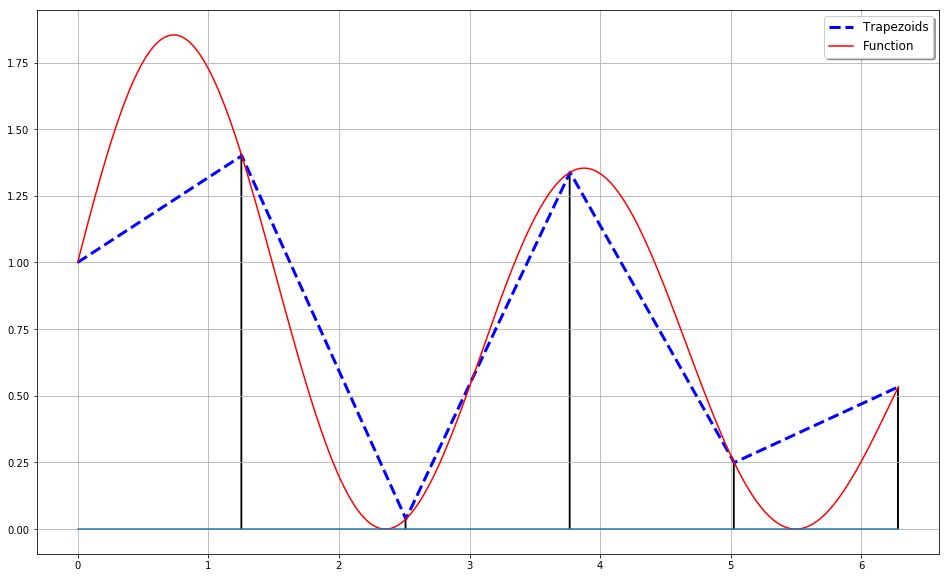

In [99]:
integral = trapezoidal(f, a, b, N)
print "'Real Value' (Gaussian Quadrature): ", quad(f, a, b)
print "Method Value: ", integral

g, ax = plt.subplots(figsize=(16.18,10))

h = (b-a)/float(N)
t = a + np.arange(N+1)*h
h = (b-a)/float(1000)
x = a + np.arange(1000+1)*h
ax.plot(t,f(t), 'b--', label="Trapezoids", linewidth=3.0)
ax.plot(x,f(x),'r', label="Function")
for xc in t[1:]:
    x = [xc-h, xc, xc, xc-h, xc-h]
    y = [0, 0, f(xc), f(xc-h), 0]
    ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))
    
ax.plot(t,np.zeros_like(t))
ax.grid()
ax.legend(shadow=True, fontsize=12, loc=0)

plt.show()

### Simpson's Rule

The Simpson's rule consists of:

In [ ]:
## Using here the chained trapezoidal rule

**Definition**

In [7]:
def simpson(f, a, b, n):
    h=(b-a)/n
    k=0.0
    x=a + h
    for i in range(1,n/2 + 1):
        k += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(1,n/2):
        k += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+k)

**parameters**

In [54]:
def f(t):
    return (1+np.sin(2*t))*np.exp(-0.1*t)

a = 0.0
b = 2*np.pi
N = 2

Notice that N must be even, hence each parabole uses 3 points and their step is 2 points.

'Real Value' (Gaussian Quadrature):  (4.89779335787146, 2.4283728785133835e-09)
Method Value:  4.66536861159


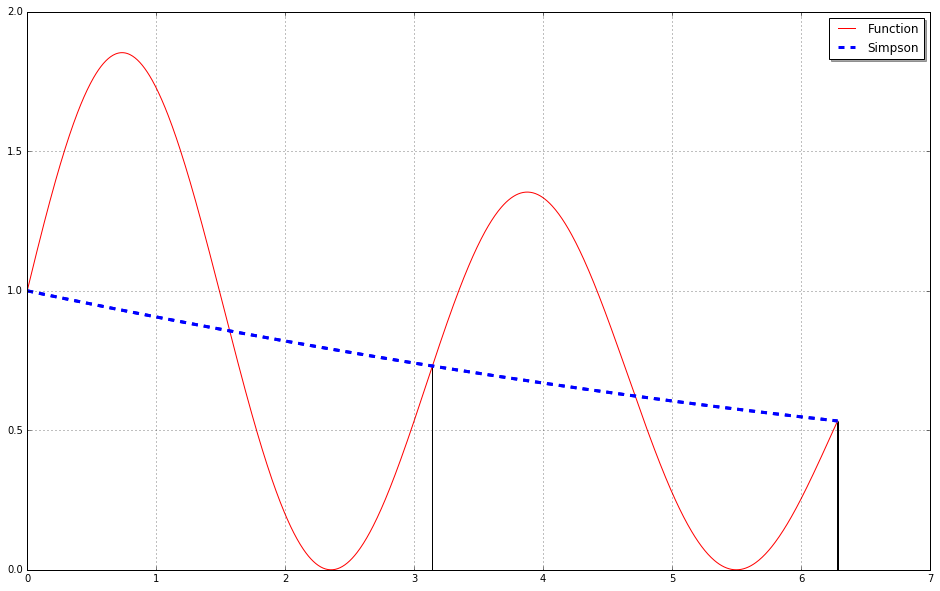

In [55]:
integral = simpson(f, a, b, N)
print "'Real Value' (Gaussian Quadrature): ", quad(f, a, b)
print "Method Value: ", integral

g, ax = plt.subplots(figsize=(16.18,10))

h = (b-a)/float(N)
t = a + np.arange(N+1)*h
h = (b-a)/float(1000)
x = a + np.arange(1000+1)*h
ax.plot(x,f(x),'r', label="Function")

for i in range(0,N-1,2):    
    x_ = np.array([t[i], t[i + 1], t[i + 2]])
    y = f(x_)
    z = np.polyfit(x_,y,2)
    d = np.array([j for j in x if j>=t[i] and j<=t[i+2]])
    ax.plot(d,z[0]*d*d + z[1]*d + z[2], 'b--', linewidth=3.0)
ax.plot (d,z[0]*d*d + z[1]*d + z[2], 'b--', label = 'Simpson', linewidth=3.0)
ax.plot(t,np.zeros_like(t), 'k')

for xc in t[1:]:
    x = [xc-h, xc-h, xc, xc]
    y = [f(xc-h), 0, 0, f(xc)]
    ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))

ax.grid()
ax.legend(shadow=True, fontsize=12, loc=0)

plt.show()